In [2]:
load('.RData')

In [3]:
library(ggplot2)
library(ropls)
library(caret)

Loading required package: lattice



In [4]:
head(df)

,MouseID,Genotype,Treatment,Behavior,class,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,⋯,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
,<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,309_1,c,m,CS,cCSm,0.5036439,0.7471932,0.4301753,2.816329,5.990152,⋯,0.2475378,1.603310,2.014875,0.1082343,1.0449792,0.8315565,0.1888517,0.1063052,0.4270992,1.675652
2,309_2,c,m,CS,cCSm,0.5146171,0.6890635,0.4117703,2.789514,5.685038,⋯,0.2576322,1.671738,2.004605,0.1097485,1.0098831,0.8492704,0.2004036,0.1065922,0.4415813,1.743610
3,309_3,c,m,CS,cCSm,0.5091831,0.7302468,0.4183088,2.687201,5.622059,⋯,0.2553430,1.663550,2.016831,0.1081962,0.9968476,0.8467087,0.1936845,0.1083031,0.4357769,1.926427
4,309_4,c,m,CS,cCSm,0.4421067,0.6170762,0.3586263,2.466947,4.979503,⋯,0.2511031,1.484624,1.957233,0.1198832,0.9902247,0.8332768,0.1921119,0.1031838,0.3916910,1.700563
5,309_5,c,m,CS,cCSm,0.4349402,0.6174298,0.3588022,2.365785,4.718679,⋯,0.2517730,1.534835,2.009109,0.1195244,0.9977750,0.8786678,0.2056042,0.1047838,0.4341538,1.839730
6,309_6,c,m,CS,cCSm,0.4475064,0.6281758,0.3673881,2.385939,4.807635,⋯,0.2444853,1.507777,2.003535,0.1206872,0.9201782,0.8436793,0.1904695,0.1064762,0.4398331,1.816389


In [5]:
set.seed(99)
index <- createDataPartition(df$class, p = 0.70, list = FALSE)
train_data <- df[index, 5:76]
test_data <- df[-index, 5:76]
sprintf("The trainining set contains %d rows", nrow(train_data))
sprintf("The test set contains %d rows", nrow(test_data))
table(train_data$class)
train_balanced <- upSample(x = train_data, y = train_data$class)
train_balanced <- train_balanced[, !(colnames(train_balanced) %in% c("Class"))]
table(train_balanced$class)

[1] "The trainining set contains 735 rows"

[1] "The test set contains 312 rows"


cCSm cCSs cSCm cSCs tCSm tCSs tSCm tSCs 
 105   84  105   84   95   74   95   93 


cCSm cCSs cSCm cSCs tCSm tCSs tSCm tSCs 
 105  105  105  105  105  105  105  105 

In [6]:
head(train_balanced)

,class,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,⋯,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cCSm,0.5091831,0.7302468,0.4183088,2.687201,5.622059,0.2090109,0.1757222,2.283337,0.2302468,⋯,0.2553430,1.663550,2.016831,0.1081962,0.9968476,0.8467087,0.1936845,0.10830306,0.4357769,1.926427
2,cCSm,0.4349402,0.6174298,0.3588022,2.365785,4.718679,0.2131059,0.1736270,2.134014,0.1921579,⋯,0.2517730,1.534835,2.009109,0.1195244,0.9977750,0.8786678,0.2056042,0.10478376,0.4341538,1.839730
3,cCSm,0.4475064,0.6281758,0.3673881,2.385939,4.807635,0.2185778,0.1762334,2.141282,0.1951875,⋯,0.2444853,1.507777,2.003535,0.1206872,0.9201782,0.8436793,0.1904695,0.10647624,0.4398331,1.816389
4,cCSm,0.4280327,0.5736958,0.3427090,2.334224,4.473130,0.2251728,0.1840038,2.012414,0.1957888,⋯,0.2380057,1.338782,1.861708,0.1170413,1.0287699,0.7982836,0.1816101,0.09783408,0.4062934,1.528484
5,cCSm,0.4169226,0.5640356,0.3277027,2.260135,4.268735,0.2148342,0.1796683,2.007985,0.1898034,⋯,0.2414346,1.386076,1.969451,0.1168776,0.9435443,0.8439662,0.1915612,0.09949367,0.3825316,1.652658
6,cCSm,0.3863109,0.5384281,0.3177204,2.125725,4.063950,0.2072216,0.1677784,1.861514,0.1806845,⋯,0.2360152,1.404178,1.958736,0.1138640,0.9469095,0.8321823,0.1863778,0.10514503,0.4356872,1.834599


PLS-DA
840 samples x 71 variables and 1 response
standard scaling of predictors and response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE pre ort pR2Y  pQ2
Total    0.906    0.682   0.633 0.189  20   0 0.05 0.05


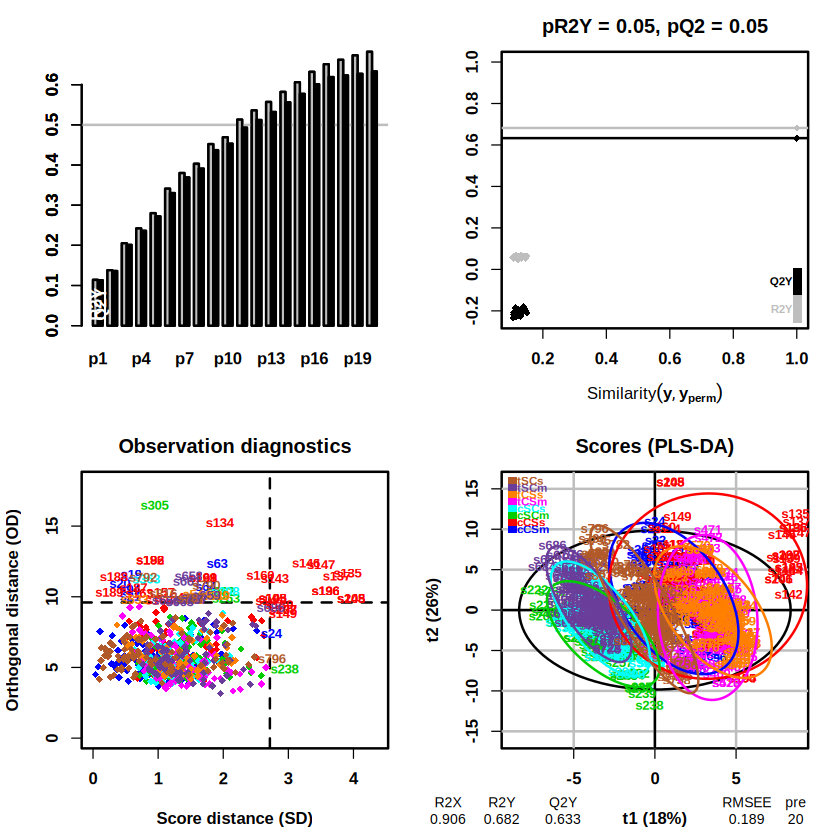

In [7]:
res.plsda <- opls(train_balanced[, 2:72], train_balanced$class, 
                  algoC = 'nipals',
                  predI = 20,
                  crossvalI = 10, 
                  scale = 'standard')

In [8]:
res.plsda@modelDF

,R2X,R2X(cum),R2Y,R2Y(cum),Q2,Q2(cum),Signif.,Iter.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
p1,0.17600,0.176,0.11400,0.114,0.11300,0.113,R1,17
p2,0.25600,0.432,0.02470,0.138,0.02550,0.136,R1,54
p3,0.07010,0.502,0.06640,0.205,0.07550,0.201,R1,30
p4,0.08720,0.590,0.03720,0.242,0.04350,0.236,R1,60
p5,0.05300,0.643,0.03850,0.280,0.04740,0.272,R1,151
p6,0.03070,0.673,0.06010,0.341,0.07960,0.330,R1,99
p7,0.04180,0.715,0.03930,0.380,0.05740,0.369,R1,28
p8,0.04400,0.759,0.02340,0.403,0.03610,0.391,R1,2324
p9,0.01870,0.778,0.04850,0.452,0.07450,0.437,R1,30


In [9]:
plsda_preds <- predict(res.plsda, test_data[, 2:72])
confusionMatrix(plsda_preds, test_data$class)

### MIRAR LA FUNCION confusionMatrix

Confusion Matrix and Statistics

          Reference
Prediction cCSm cCSs cSCm cSCs tCSm tCSs tSCm tSCs
      cCSm   45    3    0    0    1    0    0    0
      cCSs    0   31    0    0    0    0    0    0
      cSCm    0    0   44    0    0    0    2    0
      cSCs    0    0    0   32    0    0    1    0
      tCSm    0    2    0    0   37    0    0    0
      tCSs    0    0    0    0    2   31    0    0
      tSCm    0    0    0    4    0    0   37    1
      tSCs    0    0    1    0    0    0    0   38

Overall Statistics
                                          
               Accuracy : 0.9455          
                 95% CI : (0.9142, 0.9679)
    No Information Rate : 0.1442          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9376          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: cCSm Class: cCSs Class: cSCm C

In [11]:
vip <- getVipVn(res.plsda)
vip <- names(vip[vip > 1])

PLS-DA
840 samples x 29 variables and 1 response
standard scaling of predictors and response(s)
      R2X(cum) R2Y(cum) Q2(cum) RMSEE pre ort pR2Y  pQ2
Total    0.847    0.471   0.449 0.242  11   0 0.05 0.05


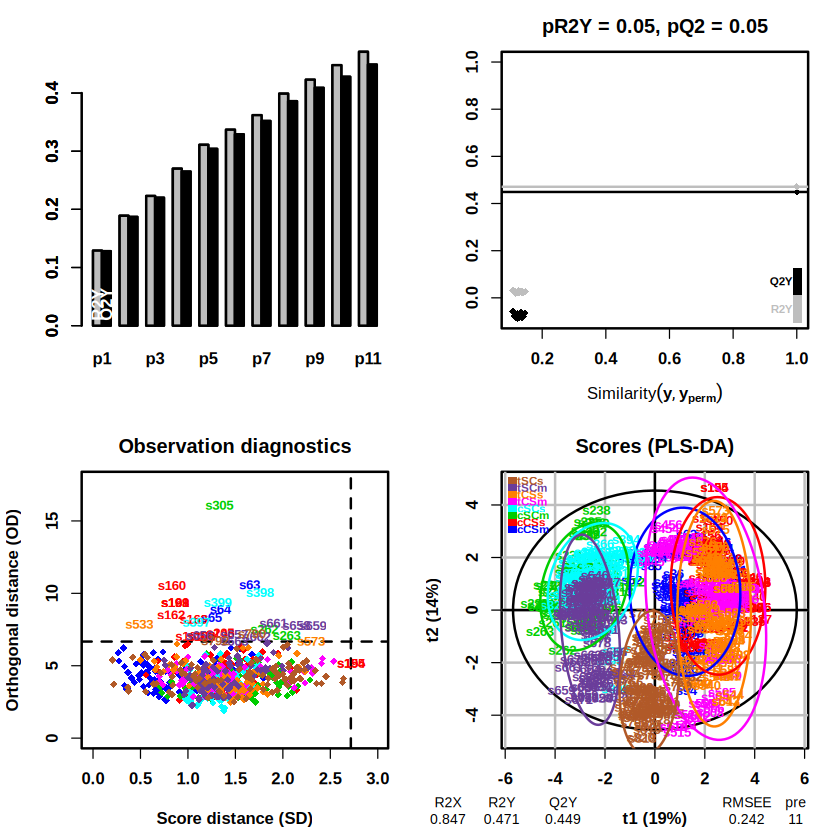

In [13]:
res.plsda <- opls(train_balanced[, vip], train_balanced$class, 
                  algoC = 'nipals',
                  predI = 11,
                  crossvalI = 10, 
                  scale = 'standard')

In [14]:
res.plsda@modelDF

,R2X,R2X(cum),R2Y,R2Y(cum),Q2,Q2(cum),Signif.,Iter.
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
p1,0.1880,0.188,0.1290,0.129,0.1280,0.128,R1,20
p2,0.1380,0.326,0.0599,0.189,0.0670,0.187,R1,20
p3,0.1080,0.433,0.0345,0.223,0.0407,0.220,R1,113
p4,0.0689,0.502,0.0469,0.270,0.0584,0.265,R1,43
p5,0.0756,0.578,0.0408,0.311,0.0526,0.304,R1,55
p6,0.0757,0.654,0.0260,0.337,0.0355,0.329,R1,61
p7,0.0662,0.720,0.0252,0.362,0.0348,0.352,R1,80
p8,0.0328,0.753,0.0366,0.399,0.0528,0.386,R1,44
p9,0.0374,0.790,0.0243,0.423,0.0371,0.409,R1,50


In [15]:
plsda_preds <- predict(res.plsda, test_data[, vip])
confusionMatrix(plsda_preds, test_data$class)

Confusion Matrix and Statistics

          Reference
Prediction cCSm cCSs cSCm cSCs tCSm tCSs tSCm tSCs
      cCSm   38    0    0    0    4    0    1    0
      cCSs    5   33    0    0    3    0    0    0
      cSCm    0    0   39    2    0    0    6    1
      cSCs    0    0    3   25    0    0    7    0
      tCSm    2    0    1    0   26    1    0    0
      tCSs    0    3    0    0    5   30    0    0
      tSCm    0    0    1    9    0    0   26    6
      tSCs    0    0    1    0    2    0    0   32

Overall Statistics
                                          
               Accuracy : 0.7981          
                 95% CI : (0.7492, 0.8412)
    No Information Rate : 0.1442          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.769           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: cCSm Class: cCSs Class: cSCm C

In [16]:
save.image()